# HIV Model
<bk>
    Corinne Wilklow

In [231]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

print('done')

done


In [241]:
def make_system(init, tau,gamma,mu,beta,alpha,delta,rho,pi,sigma):
    """Make a system object for the HIV model.
    
    beta: contact rate in days
    gamma: recovery rate in days
    
    returns: System object
    """
    

    t0 = 0
    t_end = 120
    dt=0.1

    return System(init=init, t0=t0, t_end=t_end, dt=dt,tau=tau,
                  gamma=gamma,mu=mu,beta=beta,alpha=alpha,
                  delta=delta,rho=rho,pi=pi,sigma=sigma)

In [242]:
tau=0.2
gamma=1.34
mu=1.3e-3
beta=0.00027
alpha=3.6e-2
delta=0.33
rho=0.1
pi=100
sigma=2
init= State(R=200, L=0,E=0,V=4e-7)
system=make_system(init, tau,gamma,mu,beta,alpha,delta,rho,pi,sigma)

,values
init,R 2.000000e+02 L 0.000000e+00 E 0.000...
t0,0
t_end,120
dt,0.1
tau,0.2
gamma,1.34
mu,0.0013
beta,0.00027
alpha,0.036
delta,0.33


In [243]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    frame = TimeFrame(columns=system.init.index)
    frame.row[system.t0] = system.init
    
    for t in linrange(system.t0, system.t_end,dt):
        frame.row[t+dt] = update_func(frame.row[t], t, system)
    
    return frame

In [244]:
def update_func(state, t, system):
    """Update the SIR model.
    
    state: State with variables R,L,E,V
    t: time step
    system: System with beta and gamma
    
    returns: State object
    """
    unpack(system)
    r, l, e, v = state

    dR = (gamma * tau - mu * r - beta * r * v) * dt
    dL = (rho * beta * r * v - mu * l - alpha * l) * dt
    dE = ((1 - rho) * beta * r * v + alpha * l - delta * e) * dt
    dV = (pi * e - sigma * v) * dt
    
    R = r +dR
    L = l +dL
    E = e +dE
    V = v +dV
    
    return State(R=R, L=L, E=E, V=V)

In [245]:
test=update_func(system.init,system.t0,system)

,values
R,2.000008e+02
L,2.160000e-10
E,1.944000e-09
V,3.200000e-07


In [246]:
results=run_simulation(system,update_func)

,R,L,E,V
0.0,200.000000,0.000000e+00,0.000000e+00,4.000000e-07
0.1,200.000800,2.160000e-10,1.944000e-09,3.200000e-07
0.2,200.001600,3.879950e-10,3.435832e-09,2.754400e-07
0.3,200.002400,5.352866e-10,4.662495e-09,2.547103e-07
0.4,200.003199,6.708352e-10,5.748467e-09,2.503932e-07
0.5,200.003999,8.035475e-10,6.778113e-09,2.577992e-07
0.6,200.004798,9.397646e-10,7.810257e-09,2.740205e-07
0.7,200.005598,1.084234e-09,8.887674e-09,2.973190e-07
0.8,200.006397,1.240746e-09,1.004329e-08,3.267319e-07
0.9,200.007196,1.412559e-09,1.130430e-08,3.618185e-07


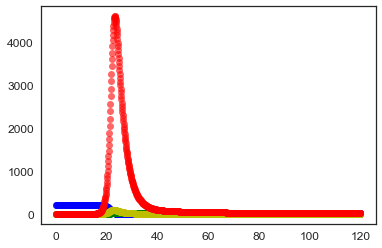

In [249]:
plot(results.R, 'bo')
plot(results.L, 'go')
plot(results.E, 'yo')
plot(results.V, 'ro')

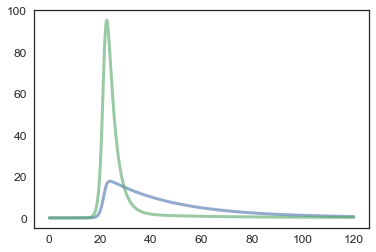

In [250]:
plot(results.L)
plot(results.E)